In [1]:
# imports

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
fig_size = [12,9]
plt.rcParams["figure.figsize"] = fig_size


In [2]:
airports = pd.read_csv("../data/flight-delays/airports.csv")
airlines = pd.read_csv("../data/flight-delays/airlines.csv")
flights = pd.read_csv("../data/flight-delays/flights.csv")

/Users/jakubkasan/coding/data-science/flight-delays/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print("Airports: ",airports.shape)
print("Airlines: ",airlines.shape)
print("Flights: ",flights.shape)

Airports:  (322, 7)
Airlines:  (14, 2)
Flights:  (5819079, 31)


In [4]:
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


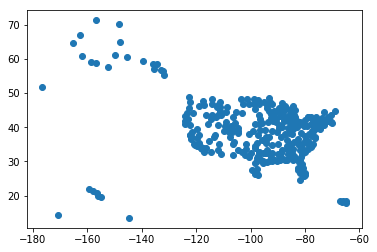

In [5]:
plt.scatter("LONGITUDE","LATITUDE",data=airports)
plt.show()

In [6]:
flights["DESTINATION_AIRPORT"].value_counts()["ATL"]

346904

In [7]:
arrival_counts = flights["DESTINATION_AIRPORT"].value_counts()
departure_counts = flights["ORIGIN_AIRPORT"].value_counts()
airports["TOTAL_ARRIVALS"] = [arrival_counts[apt] for apt in airports["IATA_CODE"]]
airports["TOTAL_DEPARTURES"] = [departure_counts[apt] for apt in airports["IATA_CODE"]]

In [8]:
total_departures = sum(departure_counts)
total_arrivals = sum(arrival_counts)

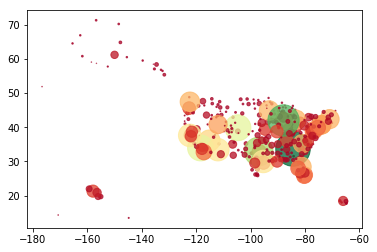

In [9]:
s = [(x/total_departures)*20000 for x in airports["TOTAL_DEPARTURES"]]
plt.scatter("LONGITUDE","LATITUDE",data=airports,s=s,cmap="RdYlGn",c=s,alpha=0.75)
plt.show()

In [10]:
flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [ ]:
from matplotlib import lines as mlines

In [ ]:
def newline(x1,y1,x2,y2):
    ax = plt.gca()
    line = mlines.Line2D([x1,x2],[y1,y2])
    ax.add_line(line)
    return line

In [11]:
def getRouteArgs(flights,airports):
    route_args = []
    unique_airports = airports["IATA_CODE"].unique()
    departures = [x for x in flights["ORIGIN_AIRPORT"].unique() if x in unique_airports]
    arrivals = [x for x in flights["DESTINATION_AIRPORT"].unique() if x in unique_airports]
    for departure in departures:
        for arrival in arrivals:
            route_args.append((departure,arrival))
    return(route_args)



def getRoutes(flights,airports,threads,route_args):
    results = threads.map(lambda x: getRouteDate(flights,airports,x),route_args)
    return results

def getRouteDate(flights,airports,routes_tup):
    departure = routes_tup[0]
    arrival = routes_tup[1]
    # get the index of relevant flights at start to save looking it up repeatedly
    selection = flights.loc[(flights["ORIGIN_AIRPORT"]==departure)&(flights["DESTINATION_AIRPORT"]==arrival),:]
    if selection.empty:
        return
    departure_loc = airports.loc[airports["IATA_CODE"]==departure,["LATITUDE","LONGITUDE"]]
    arrival_loc = airports.loc[airports["IATA_CODE"]==arrival,["LATITUDE","LONGITUDE"]]
    temp = dict(
        origin = departure,
        origin_lat = departure_loc["LATITUDE"],
        origin_long = departure_loc["LONGITUDE"],
        destination = arrival,
        destination_lat = arrival_loc["LATITUDE"],
        destination_long = arrival_loc["LONGITUDE"],
        num_flights = selection.shape[0],
        average_landing_delay = np.mean(selection["ARRIVAL_DELAY"])   
    )
    return(temp)
        

In [15]:
from multiprocessing.dummy import Pool as ThreadPool

threads = ThreadPool(8)

In [12]:
route_args = getRouteArgs(flights,airports)

In [16]:
myroutes = getRoutes(flights,airports,threads,route_args)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

KeyboardInterrupt



In [13]:
len(route_args)

103684

In [ ]:
plt.figure(figsize=(15,12))
for i in range(20):
    plt.plot([airports["LATITUDE"][i],airports["LATITUDE"][i+20]],[airports["LONGITUDE"][i],airports["LATITUDE"][i+20]])
plt.show()


In [ ]:
flights.loc[(flights["DESTINATION_AIRPORT"] =="ABR") & (flights["ORIGIN_AIRPORT"]=="ABR"),:].empty

In [ ]:
len([x for x in flights["DESTINATION_AIRPORT"].unique() if x in airports["IATA_CODE"].unique()])

In [ ]:
len(flights["DESTINATION_AIRPORT"].unique())